In [1]:
# Basic set of Python Data Analysis
import numpy as np
import pandas as pd
%matplotlib inline

## don't show warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
## for generate data
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import load_digits

## for model selection
from sklearn.model_selection import train_test_split

## for machine learning with scikit learn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

## for metrics
from sklearn.metrics import confusion_matrix

## for my functions
import testml as tml

# Naive Bayes

In [3]:
X,y = make_blobs(2000, 2, centers=2, random_state=2, cluster_std=2.0)

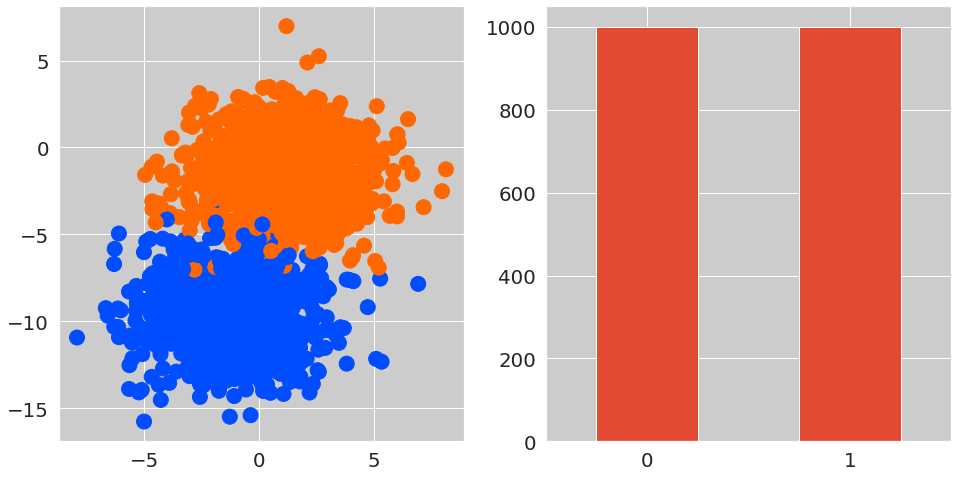

In [4]:
tml.srcplot(X,y)

In [5]:
X_train, X_test,y_train,y_test = train_test_split(X, y, random_state=0, train_size=0.8)

In [6]:
bayes = GaussianNB()
bayes.fit(X_train,y_train)

GaussianNB()

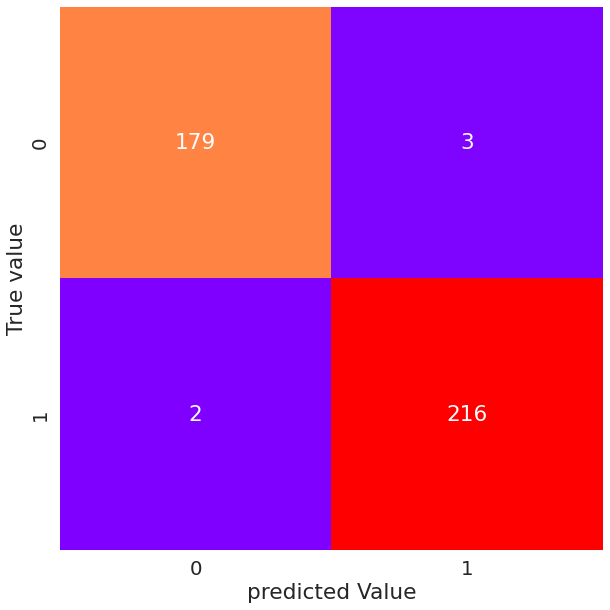

In [7]:
y_pred = bayes.predict(X_test)
tml.cmplot(y_test, y_pred)

# Support Vector Machine (SVM)

## Linear Kernel

In [8]:
X,y = make_blobs(50, 2, centers=2, random_state=0, cluster_std=0.6)

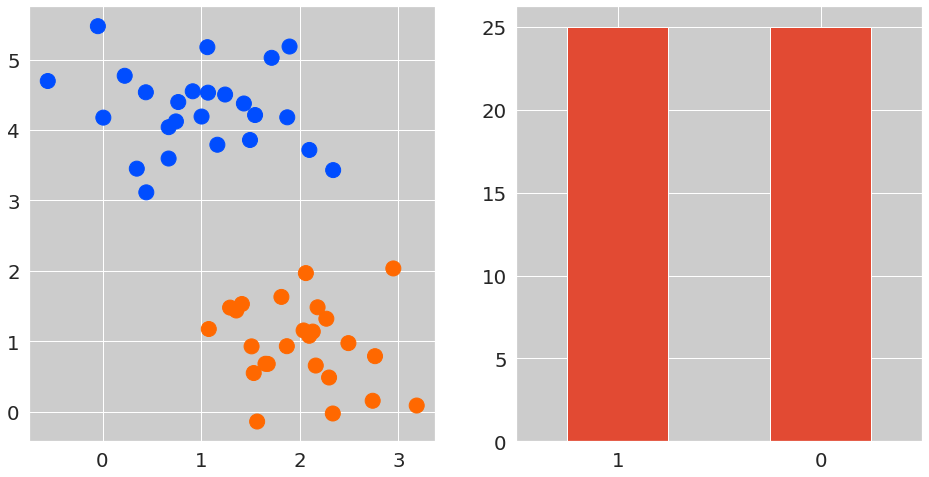

In [9]:
tml.srcplot(X,y)

In [10]:
svcl = SVC(kernel='linear', C=1E10)
svcl.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

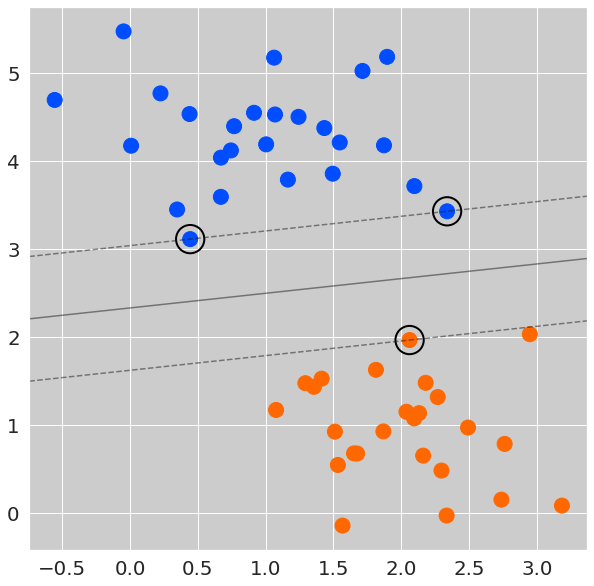

In [11]:
tml.svcplot(X, y, svcl)

In [12]:
svcl.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

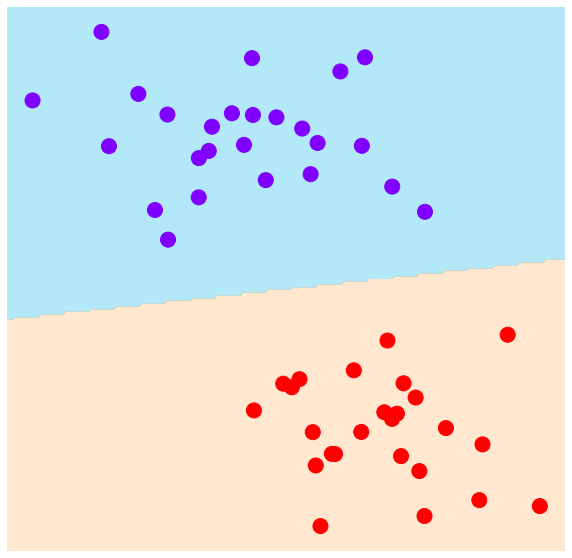

In [13]:
tml.vclplot(svcl, X, y)

## Gaussian Kernel

In [14]:
X,y = make_circles(100, factor=0.1, noise=0.1)

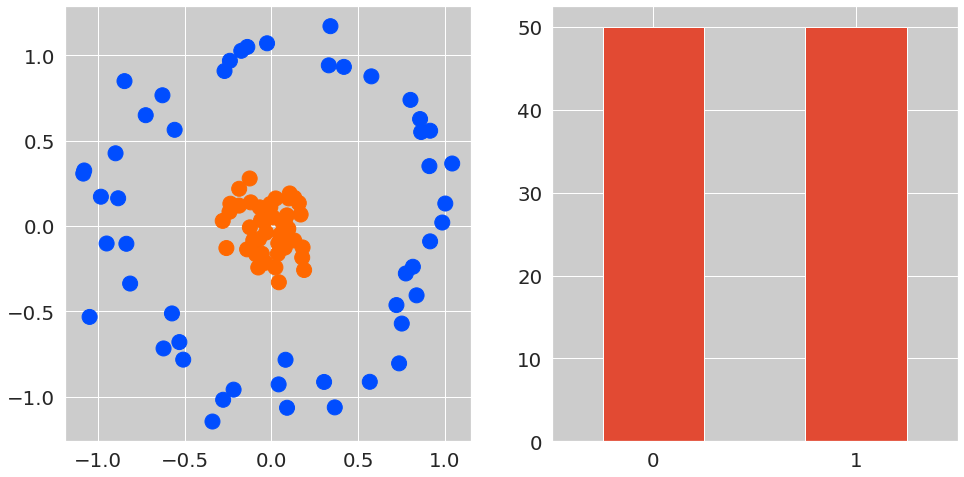

In [15]:
tml.srcplot(X, y)

In [16]:
svcg = SVC(kernel='rbf', C=1E6)
svcg.fit(X,y)

SVC(C=1000000.0)

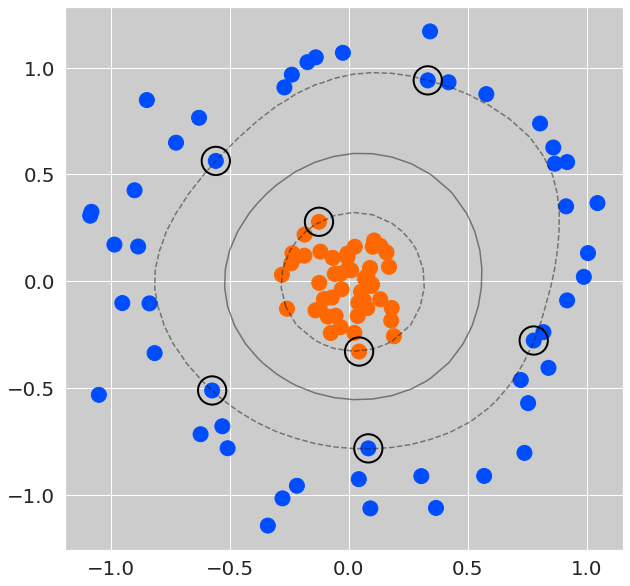

In [17]:
tml.svcplot(X, y, svcg)

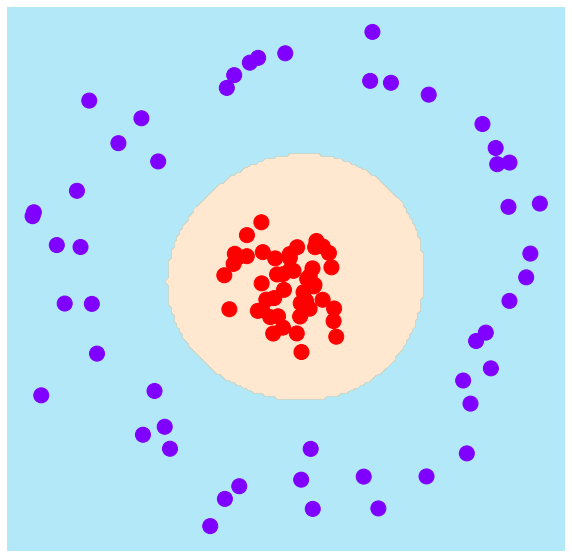

In [18]:
tml.vclplot(svcg, X, y)

# Decision Tree

In [19]:
X, y = make_blobs(300, 2, centers=4, random_state=0, cluster_std=1.0)

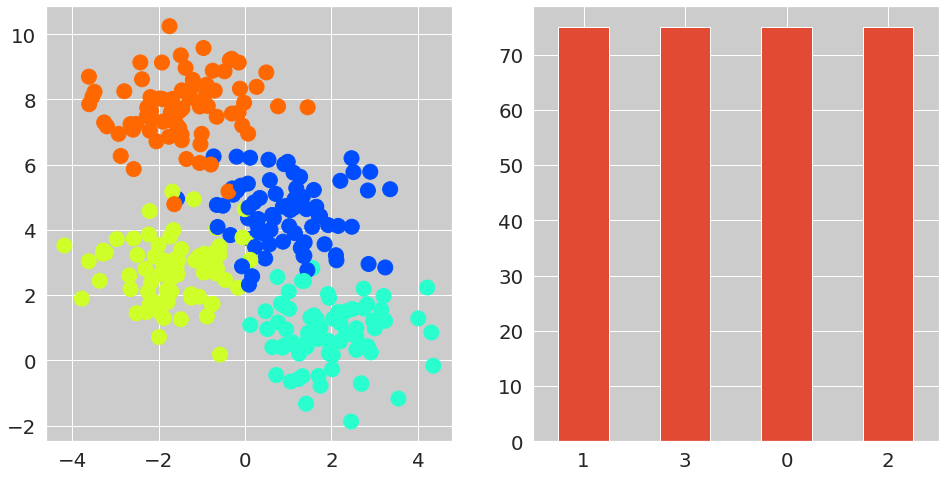

In [20]:
tml.srcplot(X, y)

In [21]:
tree = DecisionTreeClassifier()
tree.fit(X,y)

DecisionTreeClassifier()

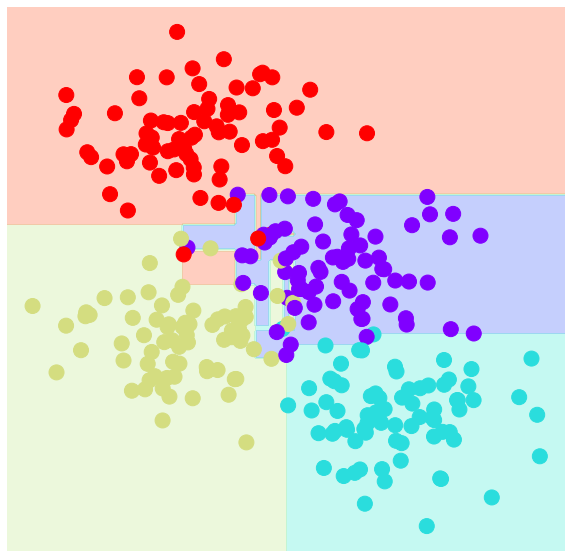

In [22]:
tml.vclplot(tree, X, y)

# Random Forest

## Blobs Data

In [23]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X, y)

RandomForestClassifier(random_state=0)

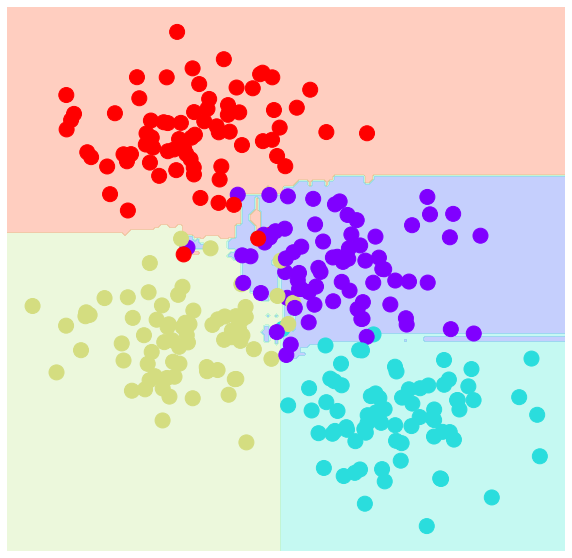

In [24]:
tml.vclplot(rfc, X, y)

## Clasify Digits

In [25]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

In [27]:
rfc4d = RandomForestClassifier(n_estimators=1000)
rfc4d.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

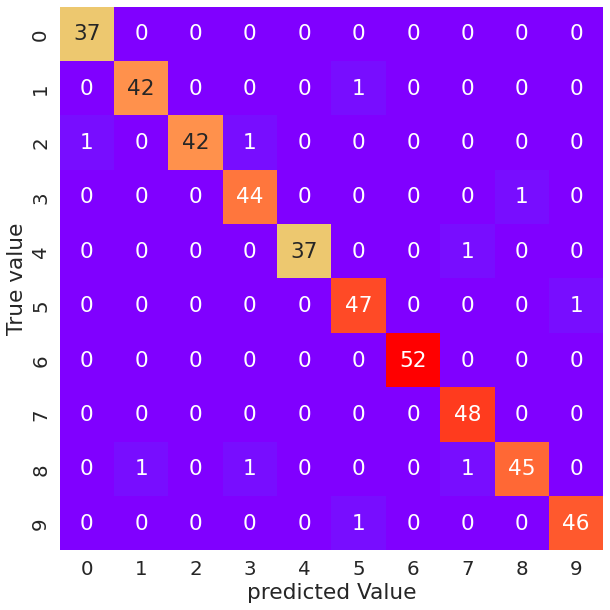

In [28]:
y_pred = rfc4d.predict(X_test)
tml.cmplot(y_test, y_pred)

# Linear Regression

In [29]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)

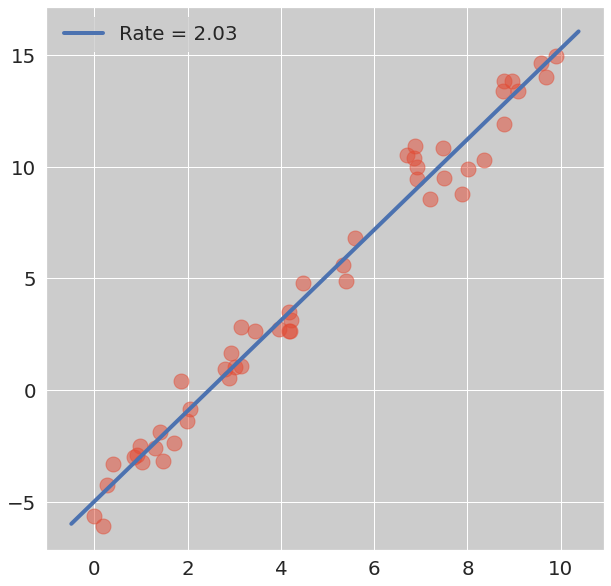

In [30]:
lnf = LinearRegression(fit_intercept=True)
lnf.fit(x[:, np.newaxis],y)
tml.lnfplot(lnf, x, y)